In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop,Adam
from keras_tuner import RandomSearch
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score

#### Data Exploration and Preprocessing

In [3]:
df=pd.read_csv("Alphabets_data.csv")

In [4]:
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [7]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [8]:
target=df['letter']

In [9]:
target.nunique()

26

In [10]:
features=df.drop(columns='letter')

In [11]:
features

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [12]:
target

0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: letter, Length: 20000, dtype: object

In [13]:
ord=LabelEncoder()
target=pd.DataFrame(ord.fit_transform(target))

In [14]:
target

,0
0,19
1,8
2,3
3,13
4,6
...,...
19995,3
19996,2
19997,19
19998,18


In [15]:
features

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [16]:
target

,0
0,19
1,8
2,3
3,13
4,6
...,...
19995,3
19996,2
19997,19
19998,18


### Model Implementation

In [18]:
scaler=StandardScaler()

In [19]:
features=scaler.fit_transform(features)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(15000, 16)
(15000, 1)
(5000, 16)
(5000, 1)


In [22]:
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [23]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
epochs=45
batch_size=500
n_classes=26
early=EarlyStopping(patience=5,monitor='val_score',mode='max')

In [25]:
### Building the model

In [26]:
model=Sequential()
model.add(Dense(16,activation='relu',input_shape=(x_train.shape[1],)))
#model.add(Dense(51,activation='relu'))
model.add(Dense(n_classes,activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │             442 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 714 (2.79 KB)

 Trainable params: 714 (2.79 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
### Model Compilation

In [28]:
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
## Model Validation

In [30]:
history=model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,y_test),callbacks=early)

Epoch 1/45
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.0352 - loss: 3.4240 - val_accuracy: 0.0562 - val_loss: 3.2820
Epoch 2/45
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0715 - loss: 3.2475 - val_accuracy: 0.0932 - val_loss: 3.1395
Epoch 3/45
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1045 - loss: 3.1052 - val_accuracy: 0.1530 - val_loss: 3.0002
Epoch 4/45
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1703 - loss: 2.9618 - val_accuracy: 0.2192 - val_loss: 2.8580
Epoch 5/45
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2351 - loss: 2.8062 - val_accuracy: 0.2788 - val_loss: 2.7116
Epoch 6/45
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2944 - loss: 2.6617 - val_accuracy: 0.3232 - val_loss: 2.5632
Epoch 7/45
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3438 - loss: 2.5165 - val_accuracy: 0.3692 - val_loss: 2.4168
Epoch 8/45
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3808 - loss: 2.3623 - val_accuracy: 0.4052 - val_loss

In [31]:
## plotting the accuracy

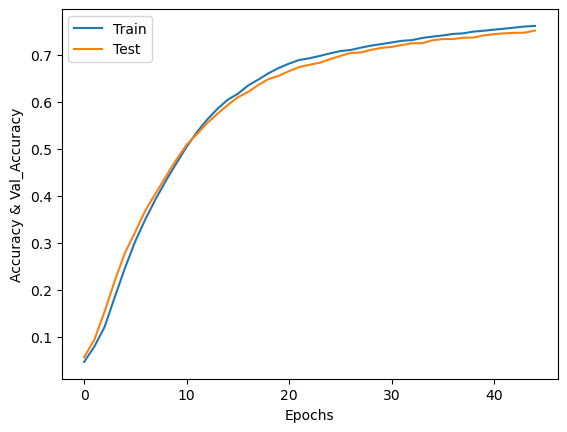

In [34]:
plt.plot(range(45),history.history['accuracy'],label='Train')
plt.plot(range(45),history.history['val_accuracy'],label='Test')
plt.xlabel('Epochs')
plt.ylabel('Accuracy & Val_Accuracy')
plt.legend(loc='best')

In [ ]:
### plotting the loss

Text(0, 0.5, 'Loss & Val_Loss')

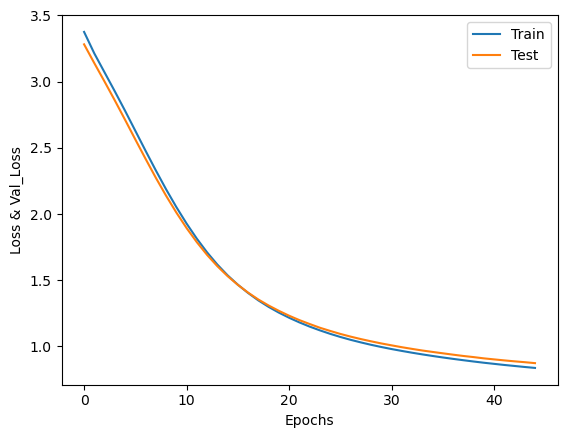

In [36]:
plt.plot(range(45),history.history['loss'],label='Train')
plt.plot(range(45),history.history['val_loss'],label='Test')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('Loss & Val_Loss')

#### Hyperparameter Tuning

In [39]:
def build_model(hp):
    model1=Sequential()
    model1.add(Dense(units=hp.Int('units', min_value=32, max_value=256, step=32), activation='relu', input_shape=(x_train.shape[1],)))
    for i in range(hp.Int('Num_of_layers',1,3)):
        model1.add(Dense(hp.Int('Number_of_Neurons'+str(i),min_value=32,max_value=512,step=32),activation=hp.Choice('activation',['relu','tanh'])))
    model1.add(Dense(n_classes,activation='softmax'))
    model1.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3,1e-4])),loss='categorical_crossentropy',metrics=['accuracy'])
    return model1

In [41]:
tuner2=RandomSearch(build_model,objective='val_accuracy',max_trials=4,project_name='Alphabets_Classification')

Reloading Tuner from .\Alphabets_Classification\tuner0.json


In [43]:
tuner2.search(x_train,y_train,epochs=epochs,validation_data=(x_test,y_test))

In [45]:
tuner2.results_summary()

Results summary
Results in .\Alphabets_Classification
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 2 summary
Hyperparameters:
units: 64
Num_of_layers: 2
Number_of_Neurons0: 352
activation: relu
learning_rate: 0.001
Number_of_Neurons1: 512
Score: 0.9563999772071838

Trial 3 summary
Hyperparameters:
units: 256
Num_of_layers: 1
Number_of_Neurons0: 480
activation: tanh
learning_rate: 0.0001
Number_of_Neurons1: 480
Score: 0.8676000237464905

Trial 0 summary
Hyperparameters:
units: 128
Num_of_layers: 2
Number_of_Neurons0: 192
activation: tanh
learning_rate: 0.01
Number_of_Neurons1: 32
Traceback (most recent call last):
  File "C:\Users\SATEESH REDDY\OneDrive\Desktop\anaconda22\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 274, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "C:\Users\SATEESH REDDY\OneDrive\Desktop\anaconda22\Lib\site-packages\keras_tuner\src\engine\base_tuner.py", line 239, in

In [46]:
best_hps = tuner2.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner2.get_best_models(num_models=1)[0]

# Print the optimal hyperparameters
print(f"Best number of layers: {best_hps.get('Num_of_layers')}")
print(f"Best units per layer: {best_hps.get('units')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")


Best number of layers: 2
Best units per layer: 64
Best learning rate: 0.001


In [48]:
y_pred=model.predict(x_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [49]:
score=model.evaluate(x_test,y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7513 - loss: 0.8709


In [50]:
pred=[]
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
print(pred)

[1, 14, 3, 8, 24, 0, 5, 10, 13, 6, 25, 6, 23, 6, 15, 19, 4, 4, 0, 22, 19, 10, 10, 11, 22, 7, 8, 1, 14, 15, 11, 20, 8, 14, 4, 24, 11, 21, 24, 2, 4, 19, 16, 3, 24, 2, 4, 10, 2, 8, 8, 24, 1, 3, 15, 5, 15, 4, 17, 21, 16, 20, 11, 1, 12, 16, 18, 8, 8, 16, 24, 22, 1, 21, 3, 2, 23, 9, 11, 12, 17, 7, 1, 1, 9, 20, 20, 24, 17, 4, 14, 16, 5, 19, 24, 4, 18, 8, 15, 15, 12, 14, 6, 22, 8, 11, 22, 12, 23, 17, 10, 10, 0, 13, 0, 20, 20, 5, 23, 4, 17, 16, 0, 13, 10, 11, 17, 7, 23, 12, 21, 22, 12, 0, 24, 25, 13, 2, 10, 16, 0, 17, 7, 3, 0, 5, 21, 23, 1, 1, 0, 7, 10, 20, 21, 25, 22, 24, 20, 18, 13, 6, 24, 8, 7, 20, 5, 6, 21, 23, 4, 10, 24, 18, 16, 22, 20, 2, 11, 19, 8, 21, 17, 8, 5, 23, 4, 9, 15, 14, 10, 1, 0, 23, 1, 12, 15, 13, 21, 25, 10, 21, 21, 5, 24, 23, 0, 14, 16, 0, 8, 15, 6, 23, 3, 3, 21, 4, 2, 7, 22, 3, 1, 3, 4, 1, 5, 13, 11, 10, 11, 12, 8, 22, 25, 10, 4, 21, 4, 6, 0, 4, 13, 22, 23, 17, 20, 11, 6, 4, 23, 9, 19, 17, 0, 11, 19, 24, 5, 4, 7, 16, 21, 12, 15, 8, 22, 9, 13, 23, 10, 15, 5, 2, 6, 16, 1, 11,

In [51]:
actual=[]
for i in range(len(y_test)):
    actual.append(np.argmax(y_test[i]))
print(actual)

[1, 16, 18, 8, 24, 0, 5, 2, 13, 11, 25, 6, 17, 6, 15, 19, 4, 4, 0, 22, 19, 10, 0, 11, 22, 1, 8, 1, 16, 15, 11, 20, 8, 24, 6, 24, 11, 15, 24, 5, 4, 24, 23, 3, 24, 2, 16, 10, 2, 8, 8, 24, 1, 3, 15, 5, 24, 4, 17, 21, 16, 20, 11, 1, 12, 4, 18, 8, 9, 16, 24, 16, 1, 14, 3, 6, 5, 9, 11, 12, 8, 1, 17, 1, 9, 20, 20, 24, 17, 4, 14, 16, 5, 5, 24, 25, 18, 8, 15, 15, 0, 14, 18, 22, 8, 11, 22, 12, 23, 1, 7, 10, 0, 13, 0, 20, 7, 5, 23, 4, 17, 16, 0, 12, 17, 11, 17, 13, 8, 22, 21, 22, 12, 0, 24, 25, 13, 6, 10, 16, 0, 17, 7, 3, 0, 5, 21, 23, 3, 1, 0, 7, 17, 20, 21, 25, 20, 24, 6, 18, 13, 19, 24, 8, 7, 20, 5, 6, 6, 23, 2, 10, 24, 18, 16, 6, 20, 2, 11, 5, 8, 21, 17, 8, 5, 23, 4, 14, 15, 16, 10, 1, 0, 11, 3, 12, 15, 13, 21, 18, 17, 21, 21, 5, 24, 3, 0, 16, 16, 16, 8, 15, 6, 23, 3, 3, 21, 4, 2, 7, 22, 3, 1, 3, 4, 17, 5, 13, 2, 6, 11, 7, 8, 22, 25, 10, 2, 6, 4, 19, 0, 25, 13, 14, 25, 17, 20, 11, 6, 4, 23, 9, 19, 17, 0, 11, 19, 24, 5, 4, 7, 16, 21, 22, 15, 8, 22, 9, 10, 18, 10, 15, 5, 2, 6, 4, 1, 11, 0, 11, 

In [52]:
accuracy_score(actual,pred)

0.7514

### Evaluation

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

# Assuming you have trained your models and have predictions
# For default model
y_pred_default = model.predict(x_test)
y_pred_default_classes = np.argmax(y_pred_default, axis=1)

# For tuned model
y_pred_tuned = best_model.predict(x_test)
y_pred_tuned_classes = np.argmax(y_pred_tuned, axis=1)

# Assuming y_test is one-hot encoded, convert it back to class indices
y_test_classes = np.argmax(y_test, axis=1)

# Print evaluation metrics for the default model
print("Default Model Evaluation:")
print(classification_report(y_test_classes, y_pred_default_classes))

# Print evaluation metrics for the tuned model
print("Tuned Model Evaluation:")
print(classification_report(y_test_classes, y_pred_tuned_classes))


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Default Model Evaluation:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       190
           1       0.68      0.80      0.73       176
           2       0.80      0.74      0.77       187
           3       0.73      0.77      0.75       209
           4       0.66      0.78      0.71       180
           5       0.77      0.66      0.71       202
           6       0.70      0.55      0.62       200
           7       0.69      0.53      0.60       180
           8       0.87      0.79      0.83       185
           9       0.81      0.77      0.79       184
          10       0.66      0.79      0.72       185
          11       0.95      0.74      0.83       184
          12       0.75      0.90      0.82       207
          13       0.81      0.84      0.83       206
          14       0.74      0.68      0.71       193
          15       0.85    

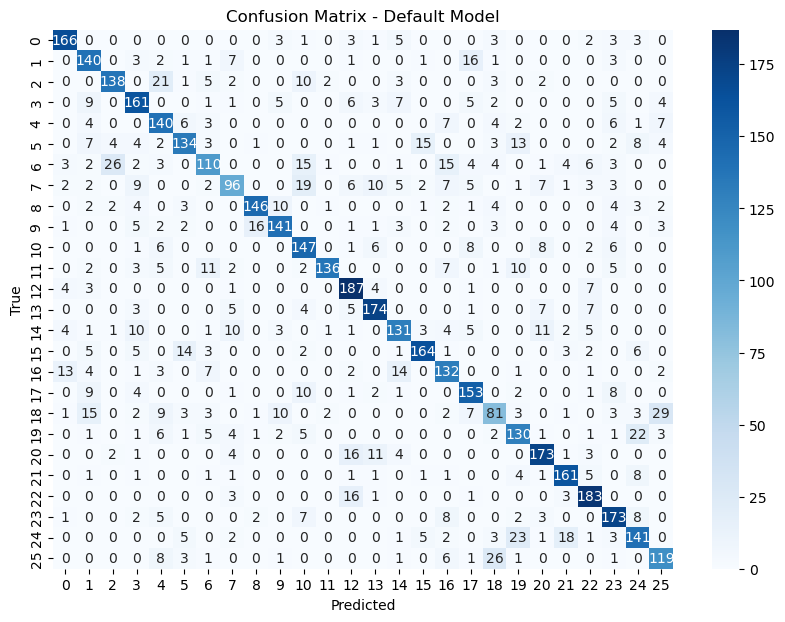

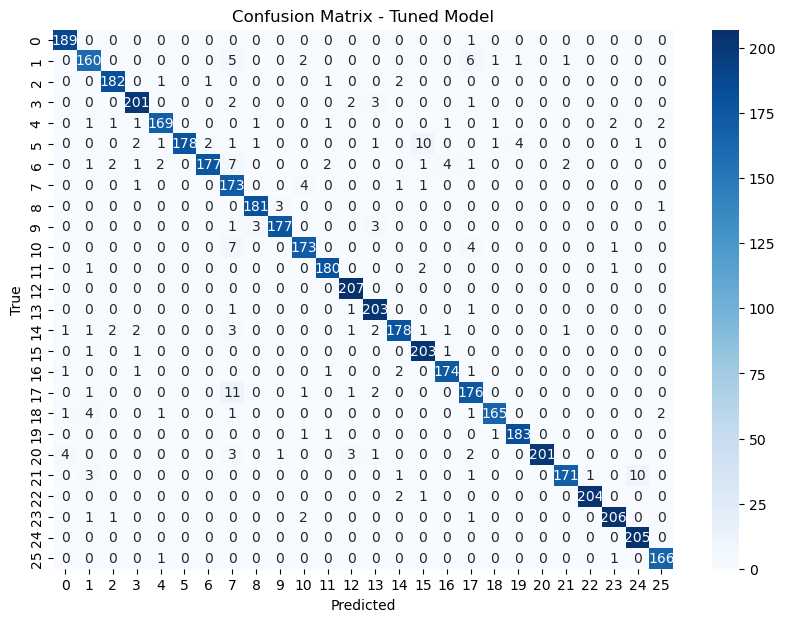

In [56]:

# Confusion Matrix for Default Model
cm_default = confusion_matrix(y_test_classes, y_pred_default_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_default, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Default Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Confusion Matrix for Tuned Model
cm_tuned = confusion_matrix(y_test_classes, y_pred_tuned_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned Model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [57]:
## Comparison of Metrics:
### The tuned model outperformed the default model in terms of all evaluated metrics, with a notable increase in F1-score from 0.75 to 0.85, indicating improved precision and recall.
###  The confusion matrix revealed that the tuned model reduced false negatives in the most frequent classes, highlighting its improved classification ability.
## Hyperparameter tuning allowed the model to learn better representations of the data by adjusting the number of hidden layers and the learning rate, leading to better generalization.